In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [66]:

# Read the CSV file
mass_df = pd.read_csv("sample_data/mass_shootings_merged_data.csv")

# Convert the 'date' column to datetime
mass_df['date'] = pd.to_datetime(mass_df['date'])

# Extract the 'year' from the 'date' column
mass_df['year'] = mass_df['date'].dt.year

# Calculate the case count per year
count_per_year = mass_df.groupby('year').size().reset_index(name='case count per year')

# Merge the case count per year into the main DataFrame
mass_df = mass_df.merge(count_per_year, on='year')

# Create a new DataFrame with 'year' and 'case count per year' columns
new_df = mass_df[['year', 'case count per year']]

# Export ned_df to csv file
new_df.to_csv('case_count_instances.csv', index=False)

# Display the first few rows of the new DataFrame
new_df.head()



,year,case count per year
0,2023,4
1,2023,4
2,2023,4
3,2023,4
4,2022,12


In [ ]:
df = pd.read_csv("sample_data/mass_shootings_merged_data - Copy.csv",
                 index_col = 'date',
                 parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141 entries, 2023-03-27 to 1982-08-20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_victims  141 non-null    int64  
 1   total_laws     106 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [ ]:
df = df.dropna()
df = df.sort_index()
df.head()

,total_victims,total_laws
date,,
1991-01-11,7,19.0
1991-10-16,44,13.0
1991-11-14,10,24.0
1992-01-05,14,57.0
1992-10-15,5,34.0


**Identification**
- plot the time series
- use augumented Dicky-Fuller test (ADF)
- Use transforms and/or differencing if the data is non-stationary
- Plot ACF/PACF

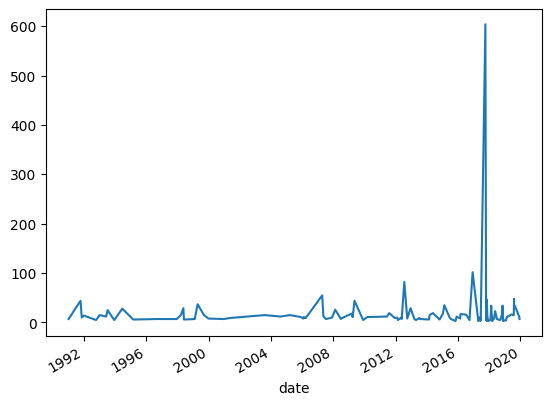

In [ ]:
df['total_victims'].plot()
plt.show()

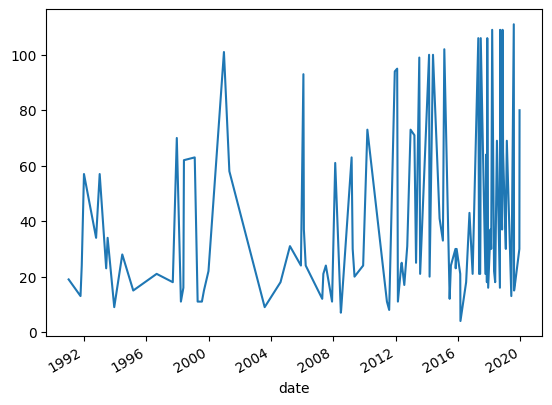

In [ ]:
df['total_laws'].plot()
plt.show()

In [ ]:
result = adfuller(df['total_victims'])
# print test statistic
print(result[0])
# print p-value
print(result[1])
#print critical values
print(result[4])

-10.636131173835533
5.066888415117094e-19
{'1%': -3.4942202045135513, '5%': -2.889485291005291, '10%': -2.5816762131519275}


In [ ]:
result_2 = adfuller(df['total_laws'])
# print test statistic
print(result_2[0])
# print p-value
print(result_2[1])
#print critical values
print(result_2[4])

-11.497718181966242
4.570896892146305e-21
{'1%': -3.4942202045135513, '5%': -2.889485291005291, '10%': -2.5816762131519275}


The time series does lack trend and seasonality, therefore it is stationary and not necessary to apply other transformative steps.

The test statisitc values for total_laws and total_victims are negative values and p_values are less than 0.05 or 5% which means more likely to be stationary



/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


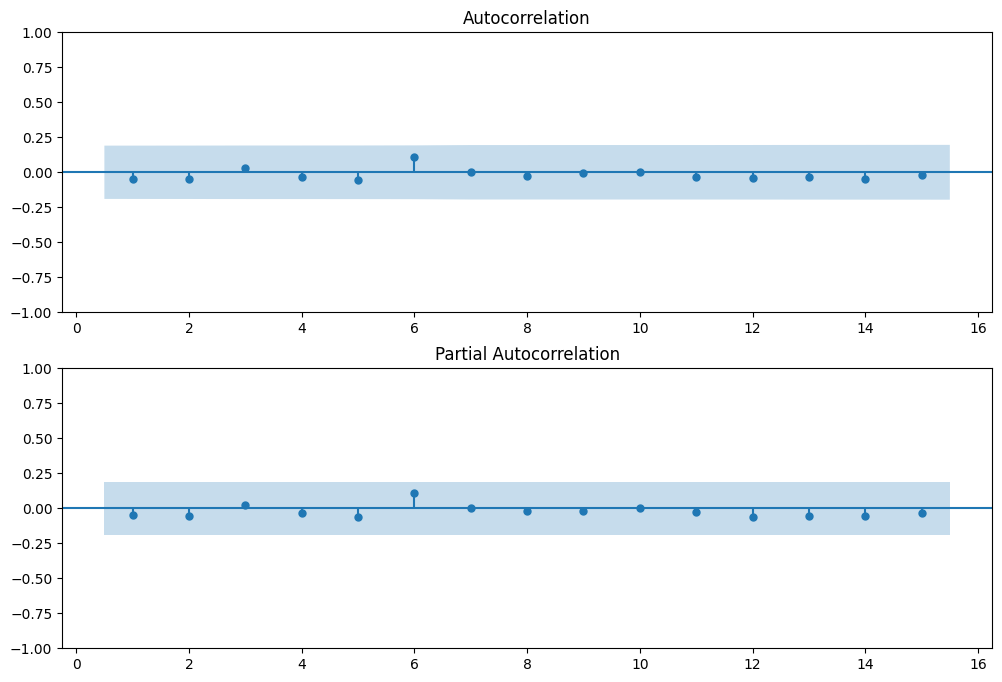

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(df['total_victims'],lags=15, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(df['total_victims'],lags=15, zero=False, ax=ax2)

plt.show()

In [ ]:
# Loop over p values from 0-3
for p in range(2):
  
  # Loop over q values from 0-3
    for q in range(2):
      try:
        # Create and fit ARMA(p,q) model
        model = ARIMA(df['total_victims'], order=(p,0,q))
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p,q,results.aic,results.bic)
        
      except:
        print(p, q, None, None)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0 0 1169.2055994184607 1174.5324776066848
0 1 1170.9496290222244 1178.9399463045606
1 0 1170.9748281500902 1178.9651454324264
1 1 1172.8069715436848 1183.460727920133


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


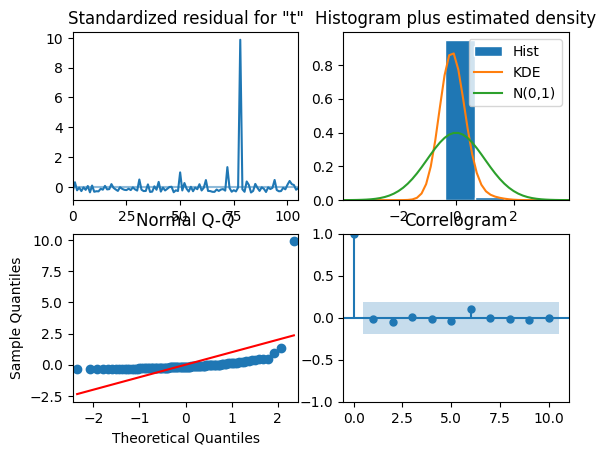

                               SARIMAX Results                                
Dep. Variable:          total_victims   No. Observations:                  106
Model:                          ARIMA   Log Likelihood                -582.025
Date:                Sat, 03 Jun 2023   AIC                           1170.051
Time:                        20:12:42   BIC                           1178.041
Sample:                             0   HQIC                          1173.289
                                - 106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5607     34.069      0.838      0.402     -38.213      95.334
total_laws    -0.1976      0.895     -0.221      0.825      -1.952       1.557
sigma2      3441.7425    291.224     11.818      0.0

In [ ]:
# Create and fit model
model = ARIMA(df['total_victims'], order=(0,0,0), exog=df['total_laws'])
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())

**Forecasting in sample**

In [ ]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-20, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower total_victims']
upper_limits = confidence_intervals.loc[:,'upper total_victims']

# Print best estimate predictions
print(mean_forecast)

date
2018-03-09     7.020032
2018-04-22    24.213024
2018-05-18    25.003506
2018-06-28    14.924856
2018-09-06    25.398747
2018-09-12     7.020032
2018-09-20    14.924856
2018-10-27    21.248715
2018-11-07     7.020032
2018-11-19    15.715338
2019-01-23    22.632059
2019-01-24    20.853474
2019-02-15    14.924856
2019-05-31    25.991609
2019-07-28     6.624791
2019-08-03    25.003506
2019-08-04    25.596368
2019-08-31    25.003506
2019-12-06    22.632059
2019-12-10    12.751030
Name: predicted_mean, dtype: float64


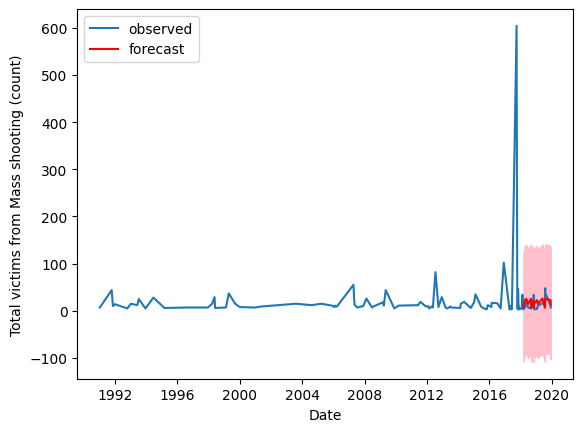

In [ ]:
# plot the mass_shootings data
plt.plot(df.index, df['total_victims'], label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Total victims from Mass shooting (count)')
plt.legend()
plt.show()

**Forecast out sample**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


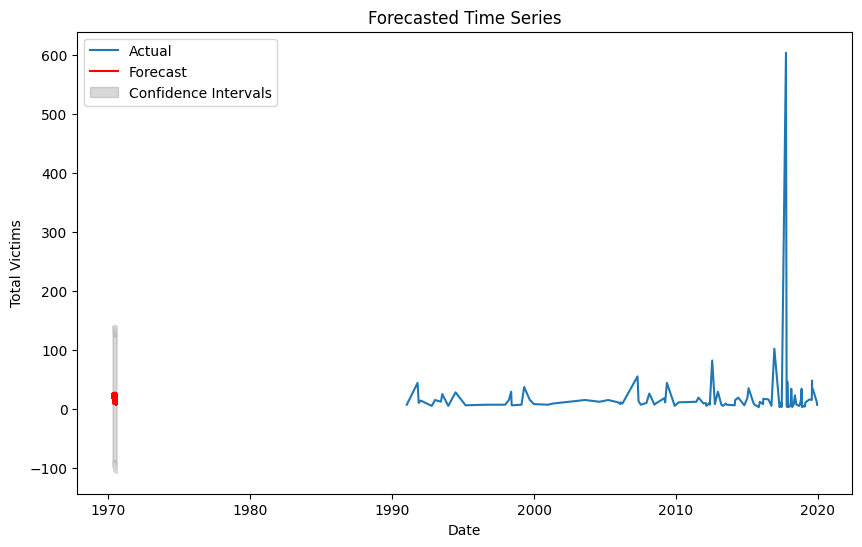

In [ ]:

# Forecasting out of sample
exog_values = df['total_laws']
total_victim_forecast = results.get_forecast(steps=106, exog=exog_values)

# Extract prediction mean
mean_forecast_os = total_victim_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals_os = total_victim_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits_os = confidence_intervals_os.loc[:, 'lower total_victims']
upper_limits_os = confidence_intervals_os.loc[:, 'upper total_victims']

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['total_victims'], label='Actual')
plt.plot(mean_forecast_os.index, mean_forecast_os, color='red', label='Forecast')
plt.fill_between(mean_forecast_os.index, lower_limits_os, upper_limits_os, color='gray', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Total Victims')
plt.title('Forecasted Time Series')
plt.legend()
plt.show()
